<a href="https://colab.research.google.com/github/GabrielTayl0r/hello-world/blob/main/src/image_transform_pil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__ Implement linear transformation on image

In [2]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Load the image

- First, you shall download an image from https://github.com/songqsh/ma2071_v01/blob/master/src/wpilogo.png to your local drive
- and upload the image file to this cloud server by clicking the folder icon on left panel in colab

In [3]:
ls

sample_data/


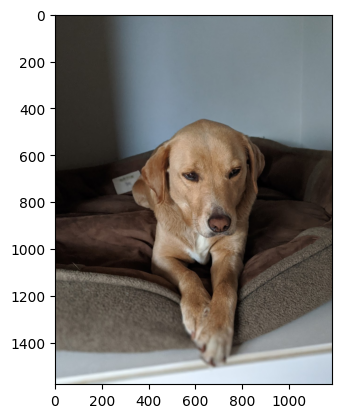

In [5]:
# Define the image file path
image_path = "/content/sample_data/brandyb.jpg"
# Load the image
image_0 = Image.open(image_path)
plt.imshow(image)

In [6]:
def image_tranform(image_np, linear_transform):
  # Get the dimensions of the image
  height, width, channels = image_np.shape

  # Define the center
  center_x = width / 2
  center_y = height / 2

  # Loop through each pixel in the image and apply the transformation
  transformed_image = np.zeros_like(image_np)

  for y in range(height):
      for x in range(width):
          # Translate the pixel to the origin
          translated_x = x - center_x
          translated_y = -(y - center_y)

          # Apply the transformation: matrix vector multiplication
          transformed_x, transformed_y = linear_transform@np.array([translated_x, translated_y])

          # Translate the pixel back to its original position
          transformed_x += center_x
          transformed_y = - transformed_y + center_y

          # Round the pixel coordinates to integers
          transformed_x = int(round(transformed_x))
          transformed_y = int(round(transformed_y))

          # Copy the pixel to the transformed image
          if (transformed_x >= 0 and transformed_x < width and
              transformed_y >= 0 and transformed_y < height):
              transformed_image[transformed_y, transformed_x] = image_np[y, x]

  return transformed_image




(3) Transformation T3: Construct a linear transformation that reflects image2 through
the line y = −
1
/2
x. Name the resulting image image3. Find the standard matrix of

T3 and print image3.
(4) Transformation T: Find the standard matrix of the linear transformation T =
T2 ◦ T1. Apply T to image1 and print the resulting image.
(5) Transformation T
−1
: Find the standard matrix of the inverse transformation of T.

Apply T
−1
to image3 and print the resulting image.

(6) Favorite Transformation: Construct your favorite linear transformation and apply

it to image1. You may use a composition of shearing, rotation, or any other trans-
formation you prefer. Name the resulting image image4. Find the standard matrix

of your transformation and print image4.

The dimension of the image_np is (1578, 1184, 3)


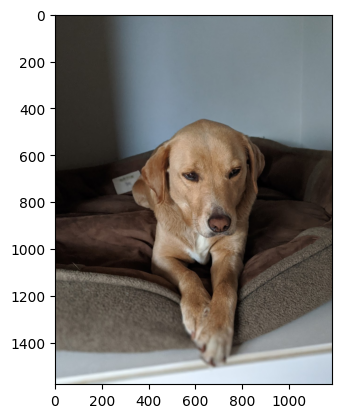

In [42]:
# Convert the image as a numpy array
image_0_np = np.array(image_0)
print(f'The dimension of the image_np is {image_0_np.shape}')
# Define the transformatin matrices
T1 = np.array([
    [0.5, 0],
    [0, 0.5]
])
T2 = np.array([
    [-3/5, 4/5],
    [4/5, 3/5]
])
T3 = np.array([
    [3/5, -4/5],
    [-4/5, -3/5]
])
T = np.array([
    [0, 0.25],
    [1, 0]
])

Tin = np.array([
    [0, 1],
    [4, 0]
])
T4 = np.array([
    [-1, 0],
    [0, -1]
])
plt.imshow(image_0)




(1) Transformation T1: Construct a linear transformation that scales image0 to half
its size, and name it image1. Find the standard matrix of T1 and print image1.

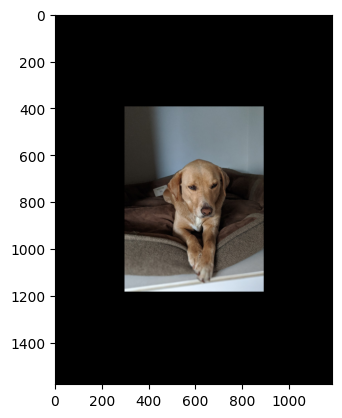

In [30]:
# apply transform
image_1 = image_tranform(image_0_np, T1)
# convert a numpy array to image
new_image1 = Image.fromarray(image_1)
plt.imshow(new_image1)


(2) Transformation T2: Construct a linear transformation that reflects image1 through
the line y = 2x. Name the resulting image image2. Find the standard matrix of T2
and print image2.

Formula used:

 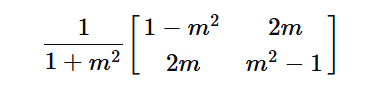

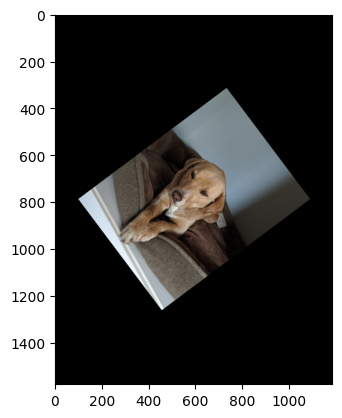

In [43]:
# apply transform
image_2 = image_tranform(image_1, T2)
# convert a numpy array to image
new_image2 = Image.fromarray(image_2)
plt.imshow(new_image2)


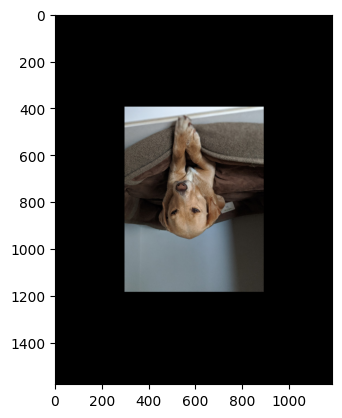

In [44]:

# apply transform
image_3 = image_tranform(image_2, T3)
# convert a numpy array to image
new_image3 = Image.fromarray(image_3)
plt.imshow(new_image3)

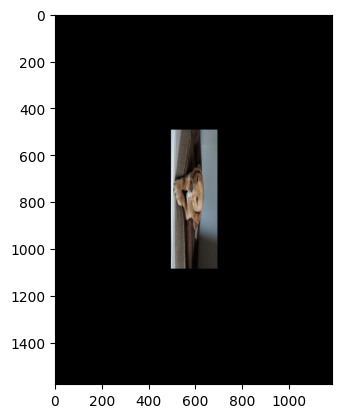

In [46]:
# apply transform
image__1 = image_tranform(image_1, T)
# convert a numpy array to image
newer_image1 = Image.fromarray(image__1)
plt.imshow(newer_image1)

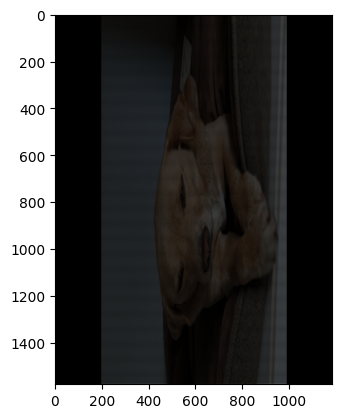

In [45]:

# apply transform
image__3 = image_tranform(image_3, Tin)
# convert a numpy array to image
newer_image3 = Image.fromarray(image__3)
plt.imshow(newer_image3)

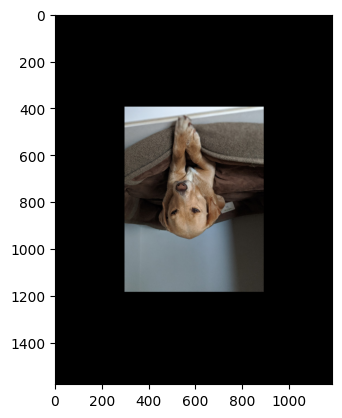

In [39]:
# apply transform
image_4 = image_tranform(image_1, T4)
# convert a numpy array to image
new_image4 = Image.fromarray(image_4)
plt.imshow(new_image4)
